In [142]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook
from scipy import optimize

In [76]:
def model_data(p, N, maxn, minn=2):
    data=[]
    for i in range(N):
        n_i=np.random.randint(minn, maxn)
        quantity=np.random.binomial(n_i, p)
        vec=np.array([1 for j in range(quantity)]+[0 for j in range(n_i-quantity)])
        np.random.shuffle(vec)
        assert(len(vec)==n_i)
        data.append(vec)
    return data

In [124]:
X=model_data(0.2, 30, 15)

To recreate conditions described in the problem formulation we only allow our program to know if vector contains at least one 1 value.

In [152]:
def estimation(p, data):
    value=0
    for vec in data:
        a=int(bool(sum(vec)))
        n=len(vec)
        v=(a*n*(1-p)**(n-1))/(1-(1-p)**(n-1))-((1-a)*n)/(1-p)
        value+=v
    return value

In [157]:
p=0.2
pdf=[]
for i in tqdm_notebook(range(1000)):
    dat=model_data(p, 100, 20)
    phat=optimize.fsolve(estimation, 0.5, args=dat)
    assert(len(phat)==1)
    pdf.append(phat[0]/p)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

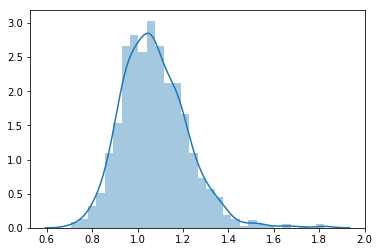

In [158]:
sns.distplot(pdf)